In [2]:
# model building process:
# > specify how to compute output given x, w and b (define model).
# > specify loss and cost functions.
# > train on data to minimise cost, using gradient descent.

# logistic regression:
# > z = np.dot(w, x) + b
# > f_x = 1 / (1 + np.exp(-z))
# > loss = - y * np.log(f_x) - (1 - y) * np.log(1 - f_x)
# > cost = (1 / m) * sum(loss[i] for i in range(1, m + 1))
# > loss = error of one training case
# > cost = average error of all training cases

# gradient descent:
# > used to minimise cost, wrt w & b.
# > w = w - alpha * dj_dw
# > b = b - alpha * dj_db

# tensor flow (allows you to define and train a neural network):
# 1/ specify neural network model (define architecture).
# 2/ compile the model with chosen loss function (which will define cost function).
# 3/ train the neural network model (gradient descen to minise cost function).

# activation:
# > activation function doest have to be sigmoid, g(z) = 1 / (1 + np.exp(-z)).
# > such as ReLU, g(z) = max(0, z).
# > such as linear, g(z) = z.
# > these three are most commonly used.
# > ie you can model brand awareness with ReLU.
# > most neural network hidden layers use ReLU.
# > final neural network layer depends on the task.
# > ReLU is much faster / cheaper than sigmoid.

# multiclass classification:
# > ie predict if y is 1 or 2 or 3 etc.
# > such as classifying handwritten digits.
# > for two possible outcomes, we use logistic regression.

# softmax regression:
# > can be used for more than two possible outputs.
# > for N = 4, we will have z1, z2, z3, z4 (z_3 = np.dot(w_3, x) + b_3).
# > a_2 = np.exp(z_2) / (np.exp(z_1) + np.exp(z_2) + np.exp(z_3) + np.exp(z_4))
# > a_m = np.exp(z_m) / sum([np.exp(z[i]) for i in range(1, m + 1)])
# > a_m = P(y=m|x) = prob that y equals m, given x.
# > can slot this softmax regression into a neural network for multiclass regression.
# > put softmax regression into output layer of the neural network.
# > such as -> 25 ReLU units -> 15 ReLU units -> 10 softmax units -> ...

# adam algorithm:
# > optimisation algorithm for gradient descent.
# > adjust alpha in gradient descent.
# > if w or b keep moving in same direction, increase alpha.
# > if w or b keep oscillating, decrease alpha.
# > also speeds up the process.

# neural network concepts:
# > dense layer means each every neuron gets all activations from previous layer.
# > dense layer means each neuron is a function of all activations in previous layer.
# > convolutional layer has each neuron working with a subset of all previous activations.
# > convolutional layer input subsets can, and often will overlap.
# > convolutional layer can be faster, require less data, and is less prone to overfitting.


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [4]:
def softmax(z):
    """Softmax converts a vector of values to a probability distribution."""
    a = np.exp(z) / np.sum(np.exp(z))
    return a

In [30]:
def display_digit(X):
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    X_reshaped = X.reshape((20,20)).T
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

In [15]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation="relu", name="layer1"),
        Dense(units=15, activation="relu", name="layer2"),
        Dense(units=10, activation="linear", name="layer3"),
    ], name = "neural_netwerk"
)
model.build()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [16]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

history = model.fit(X, y, epochs=40)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 1.9117
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.6301
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.3974
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.3151
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.2713
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.2425
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.2201
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.2016
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.1868
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.1739
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.1621
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.1515
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.1422
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.1337
Epoch 15/40
157/157 ━━━━━━━━━

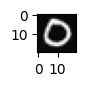

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
np.argmax(prediction): 0


In [36]:
image_of_zero = X[22]

display_digit(image_of_zero)

prediction = model.predict(image_of_zero.reshape(1,400))

print(f"np.argmax(prediction): {np.argmax(prediction)}")

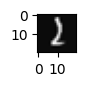

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
np.argmax(prediction): 2


In [37]:
image_of_two = X[1015]

display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))

print(f"np.argmax(prediction): {np.argmax(prediction)}")

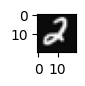

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
np.argmax(prediction): 2


In [38]:
image_of_another_two = X[1022]

display_digit(image_of_another_two)

prediction = model.predict(image_of_another_two.reshape(1,400))

print(f"np.argmax(prediction): {np.argmax(prediction)}")